# Estimation of failure probability due to wave overtopping

In this example, we will demonstrate the application of various reliability methods (`numerical_bisection`, `latin_hypercube` and `cobyla_reliability`) to estimate the probability of failure of a levee due to wave overtopping. 

### Define model

First, we import the necessary classes:

In [1]:
from probabilistic_library import ReliabilityProject, DistributionType, ReliabilityMethod

We consider the following limit state function:

$Z = q_{crit} - q_{o}$

where: <br>

* $q_{crit}$ is the critical overtopping discharge (m3/s/m) <br>
* $q_{o}$ is the occuring wave overtopping discharge (m3/s/m) <br>

The wave overtopping discharche $q_{o}$ is derived in this example using simplified equations from [*Technical Report Wave Run-up and Wave Overtopping at Dikes*, Technical Advisory Committee on Flood Defence, The Netherlands, Delft, May 2002.]. The wave overtopping depends on:

* local water level $h$ (m) <br>
* significant wave height $H_{m0}$ (m) <br>
* spectral wave period $T_{m-1,0}$ (s) <br>
* wave direction with respect to North <br>
* dike normal with respect to North <br>
* crest height $y_{crest}$ (m) <br>

In [2]:
from utils.models import z_func_overtopping

To perform a reliability analysis, we create a reliability project and specify the limit state function (model):

In [3]:
project = ReliabilityProject()
project.model = z_func_overtopping

project.model.print()

Model z_func_overtopping:
Input parameters:
  h
  hm0
  tm10
  wave_direction
  dike_normal
  y_crest
  q_crit
Output parameters:
  Z


We assume the following distributions for the parameters present in the limit state function:

In [4]:
project.variables["h"].distribution = DistributionType.log_normal
project.variables["h"].mean = 1.5
project.variables["h"].deviation = 0.05

project.variables["hm0"].distribution = DistributionType.log_normal
project.variables["hm0"].mean = 1.5
project.variables["hm0"].deviation = 0.25

project.variables["tm10"].distribution = DistributionType.log_normal
project.variables["tm10"].mean = 3
project.variables["tm10"].deviation = 0.5

project.variables["wave_direction"].distribution = DistributionType.deterministic
project.variables["wave_direction"].mean = 0.0

project.variables["dike_normal"].distribution = DistributionType.deterministic
project.variables["dike_normal"].mean = 0.0

project.variables["y_crest"].distribution = DistributionType.deterministic
project.variables["y_crest"].mean = 6.0

project.variables["q_crit"].distribution = DistributionType.log_normal
project.variables["q_crit"].mean = 0.001
project.variables["q_crit"].deviation = 0.01

### Perform reliability calculations with Numerical bisection

We start with the reliability method `numerical_bisection`. The reliability analysis is executed using `project.run()`, and the results are accessed from `project.design_point`.

Reliability (Numerical Bisection)
 Reliability index = 1.2996
 Probability of failure = 0.0969
 Convergence = 0.262 (not converged)
 Model runs = 16941
Alpha values:
 h: alpha = -0.043, x = 1.502
 hm0: alpha = -0.3456, x = 1.5938
 tm10: alpha = -0.6337, x = 3.3913
 wave_direction: alpha = 0.0, x = 0.0
 dike_normal: alpha = 0.0, x = 0.0
 y_crest: alpha = 0.0, x = 6.0
 q_crit: alpha = 0.6908, x = 0.0



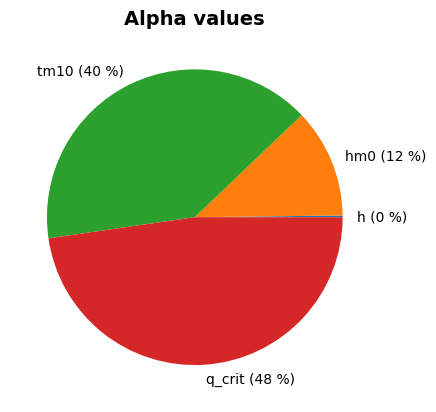

In [5]:
project.settings.reliability_method = ReliabilityMethod.numerical_bisection
project.settings.minimum_iterations = 5
project.settings.maximum_iterations = 6
project.settings.epsilon_beta = 0.1

project.run()

project.design_point.print()
project.design_point.plot_alphas()

### Perform reliability calculations with Latin hypercube

We now conduct the reliability analysis using the `latin_hypercube`.

Reliability:
 Reliability index = 1.2977
 Probability of failure = 0.0972
 Convergence = 0.0193 (not converged)
 Model runs = 25001
Alpha values:
 h: alpha = -0.0444, x = 1.5021
 hm0: alpha = -0.3482, x = 1.5945
 tm10: alpha = -0.6227, x = 3.3827
 wave_direction: alpha = 0.0, x = 0.0
 dike_normal: alpha = 0.0, x = 0.0
 y_crest: alpha = 0.0, x = 6.0
 q_crit: alpha = 0.6993, x = 0.0



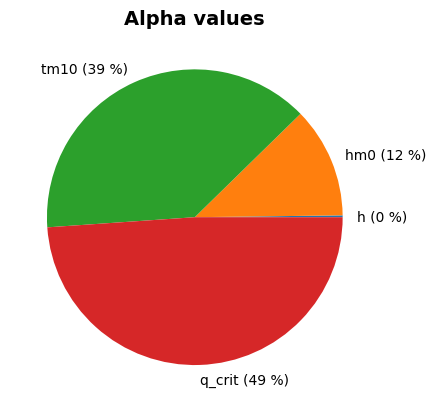

In [6]:
project.settings.reliability_method = ReliabilityMethod.latin_hypercube
project.settings.minimum_samples = 25000

project.run()

project.design_point.print()
project.design_point.plot_alphas()

### Perform reliability calculations with Cobyla algorithm

We now conduct the reliability analysis using the `cobyla_reliability` method.

Reliability (Cobyla Reliability)
 Reliability index = 1.3373
 Probability of failure = 0.0906
 Model runs = 151
Alpha values:
 h: alpha = 0.0281, x = 1.4973
 hm0: alpha = -0.1405, x = 1.5263
 tm10: alpha = -0.2975, x = 3.1606
 wave_direction: alpha = 0.0, x = 0.0
 dike_normal: alpha = 0.0, x = 0.0
 y_crest: alpha = 0.0, x = 6.0
 q_crit: alpha = 0.9439, x = 0.0



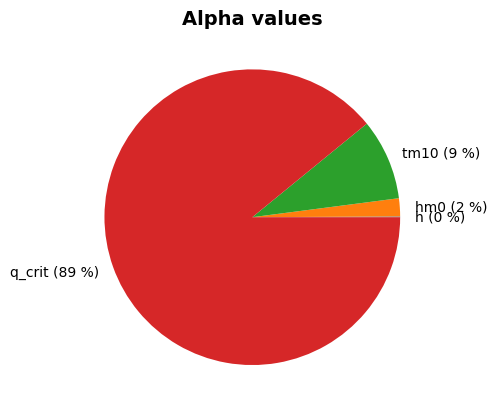

In [7]:
project.settings.reliability_method = ReliabilityMethod.cobyla_reliability
project.settings.maximum_iterations = 150
project.settings.epsilon_beta = 0.01

project.run()

project.design_point.print()
project.design_point.plot_alphas()